In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [56]:
main_df = pd.read_csv("/content/healthcare-stroke-balanced-6000.csv")
df = main_df.copy()

In [57]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,72276,Male,38.0,0,0,Yes,Private,Urban,86.93,31.1,never smoked,0
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,13276,Female,38.0,0,0,Yes,Private,Urban,71.06,22.6,Unknown,0
3,1454,Female,42.0,0,0,No,Private,Urban,84.03,31.4,never smoked,0
4,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1


In [58]:
df.drop("id", axis=1, inplace=True)

In [59]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)


In [60]:
print(df.shape)

(6000, 11)


In [61]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [62]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,56.706167,0.187333,0.134667,120.453557,29.596603,0.569833
std,21.605857,0.390211,0.341396,56.393813,6.724464,0.495141
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,45.000000,0.000000,0.000000,78.387500,25.500000,0.000000
50%,61.000000,0.000000,0.000000,97.760000,29.596603,1.000000
75%,75.000000,0.000000,0.000000,162.230000,32.500000,1.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6000 non-null   object 
 1   age                6000 non-null   float64
 2   hypertension       6000 non-null   int64  
 3   heart_disease      6000 non-null   int64  
 4   ever_married       6000 non-null   object 
 5   work_type          6000 non-null   object 
 6   Residence_type     6000 non-null   object 
 7   avg_glucose_level  6000 non-null   float64
 8   bmi                6000 non-null   float64
 9   smoking_status     6000 non-null   object 
 10  stroke             6000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 515.8+ KB


In [64]:
print(df.nunique())

gender                  3
age                   102
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    2461
bmi                   379
smoking_status          4
stroke                  2
dtype: int64


In [65]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [66]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


<Axes: >

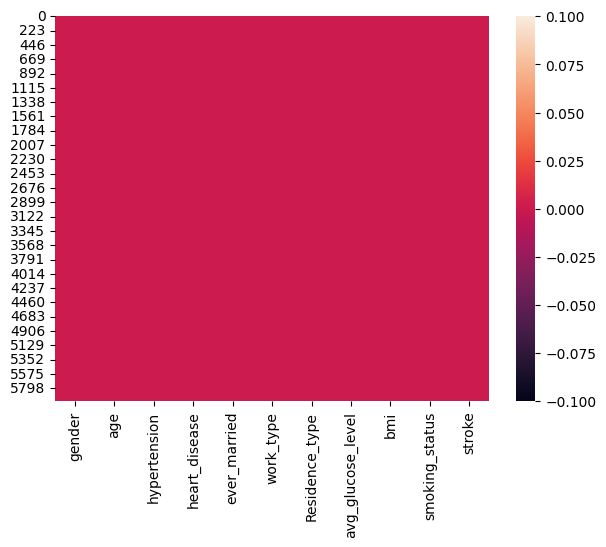

In [67]:
sns.heatmap(df.isnull())

<Axes: >

[codecarbon INFO @ 13:03:26] Energy consumed for RAM : 0.001250 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:03:26] Delta energy consumed for CPU with constant : 0.000178 kWh, power : 42.5 W
[codecarbon INFO @ 13:03:26] Energy consumed for All CPU : 0.005313 kWh
[codecarbon INFO @ 13:03:26] 0.006563 kWh of electricity used since the beginning.


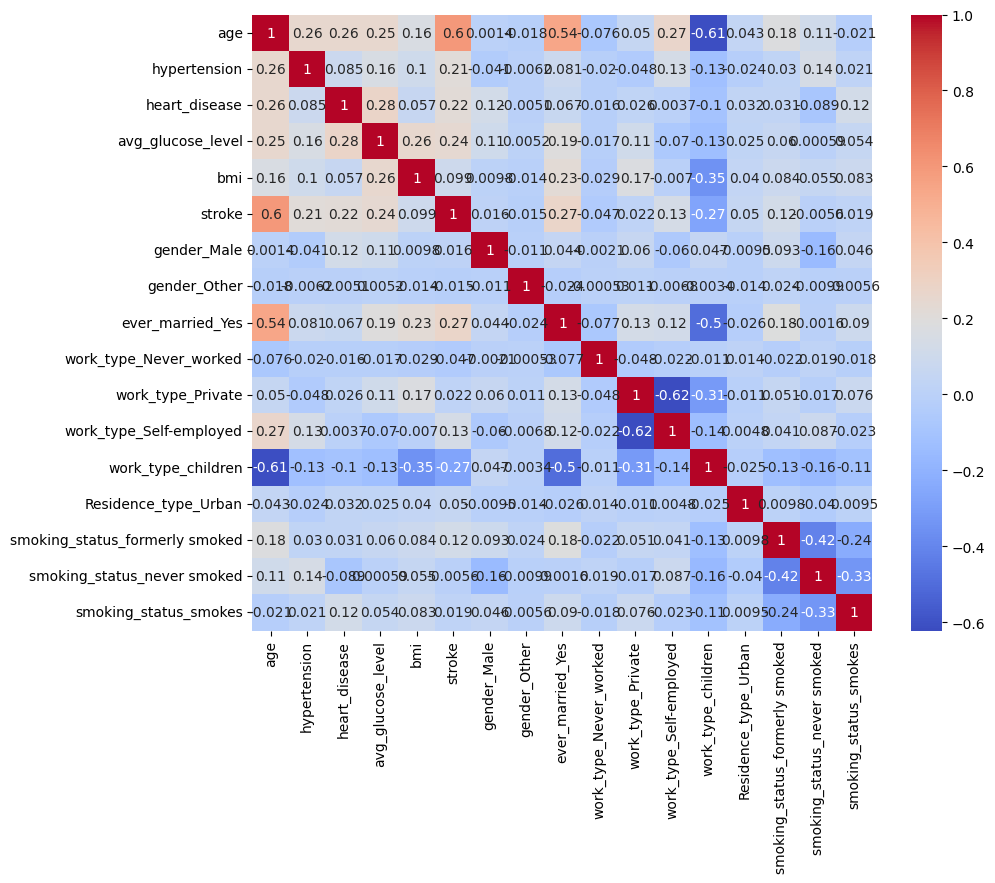

In [68]:
# Correlation heatmap (after encoding categorical variables)
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

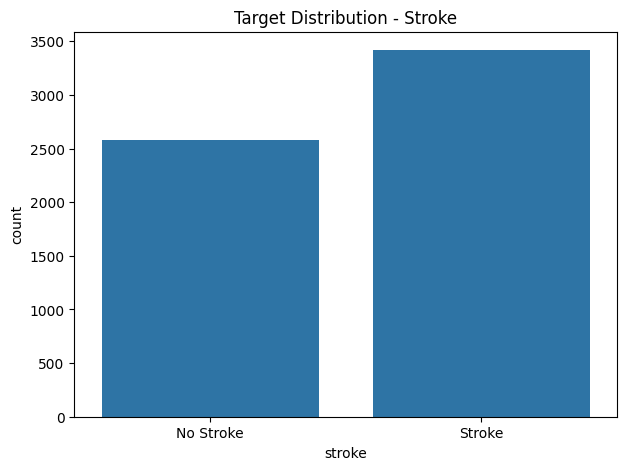

In [69]:
# Countplot of target variable (stroke)
ax = sns.countplot(x="stroke", data=df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"])
plt.title("Target Distribution - Stroke")
plt.show()

In [70]:
x = df.stroke.value_counts()
labels = [0, 1]
print(x)

stroke
1    3419
0    2581
Name: count, dtype: int64


<Axes: xlabel='stroke', ylabel='age'>

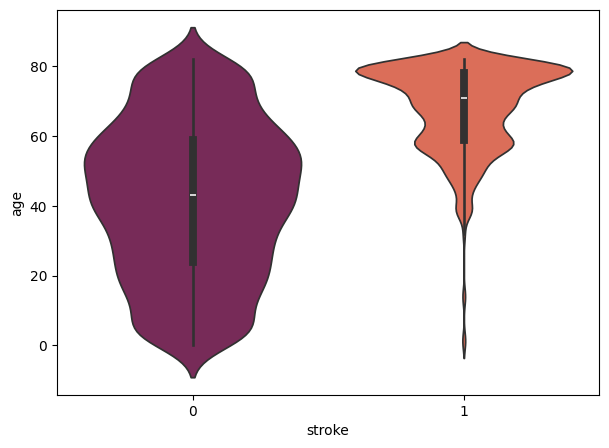

In [71]:
# Boxplots for numerical features vs stroke
sns.violinplot(x='stroke', y='age', data=df, palette='rocket')

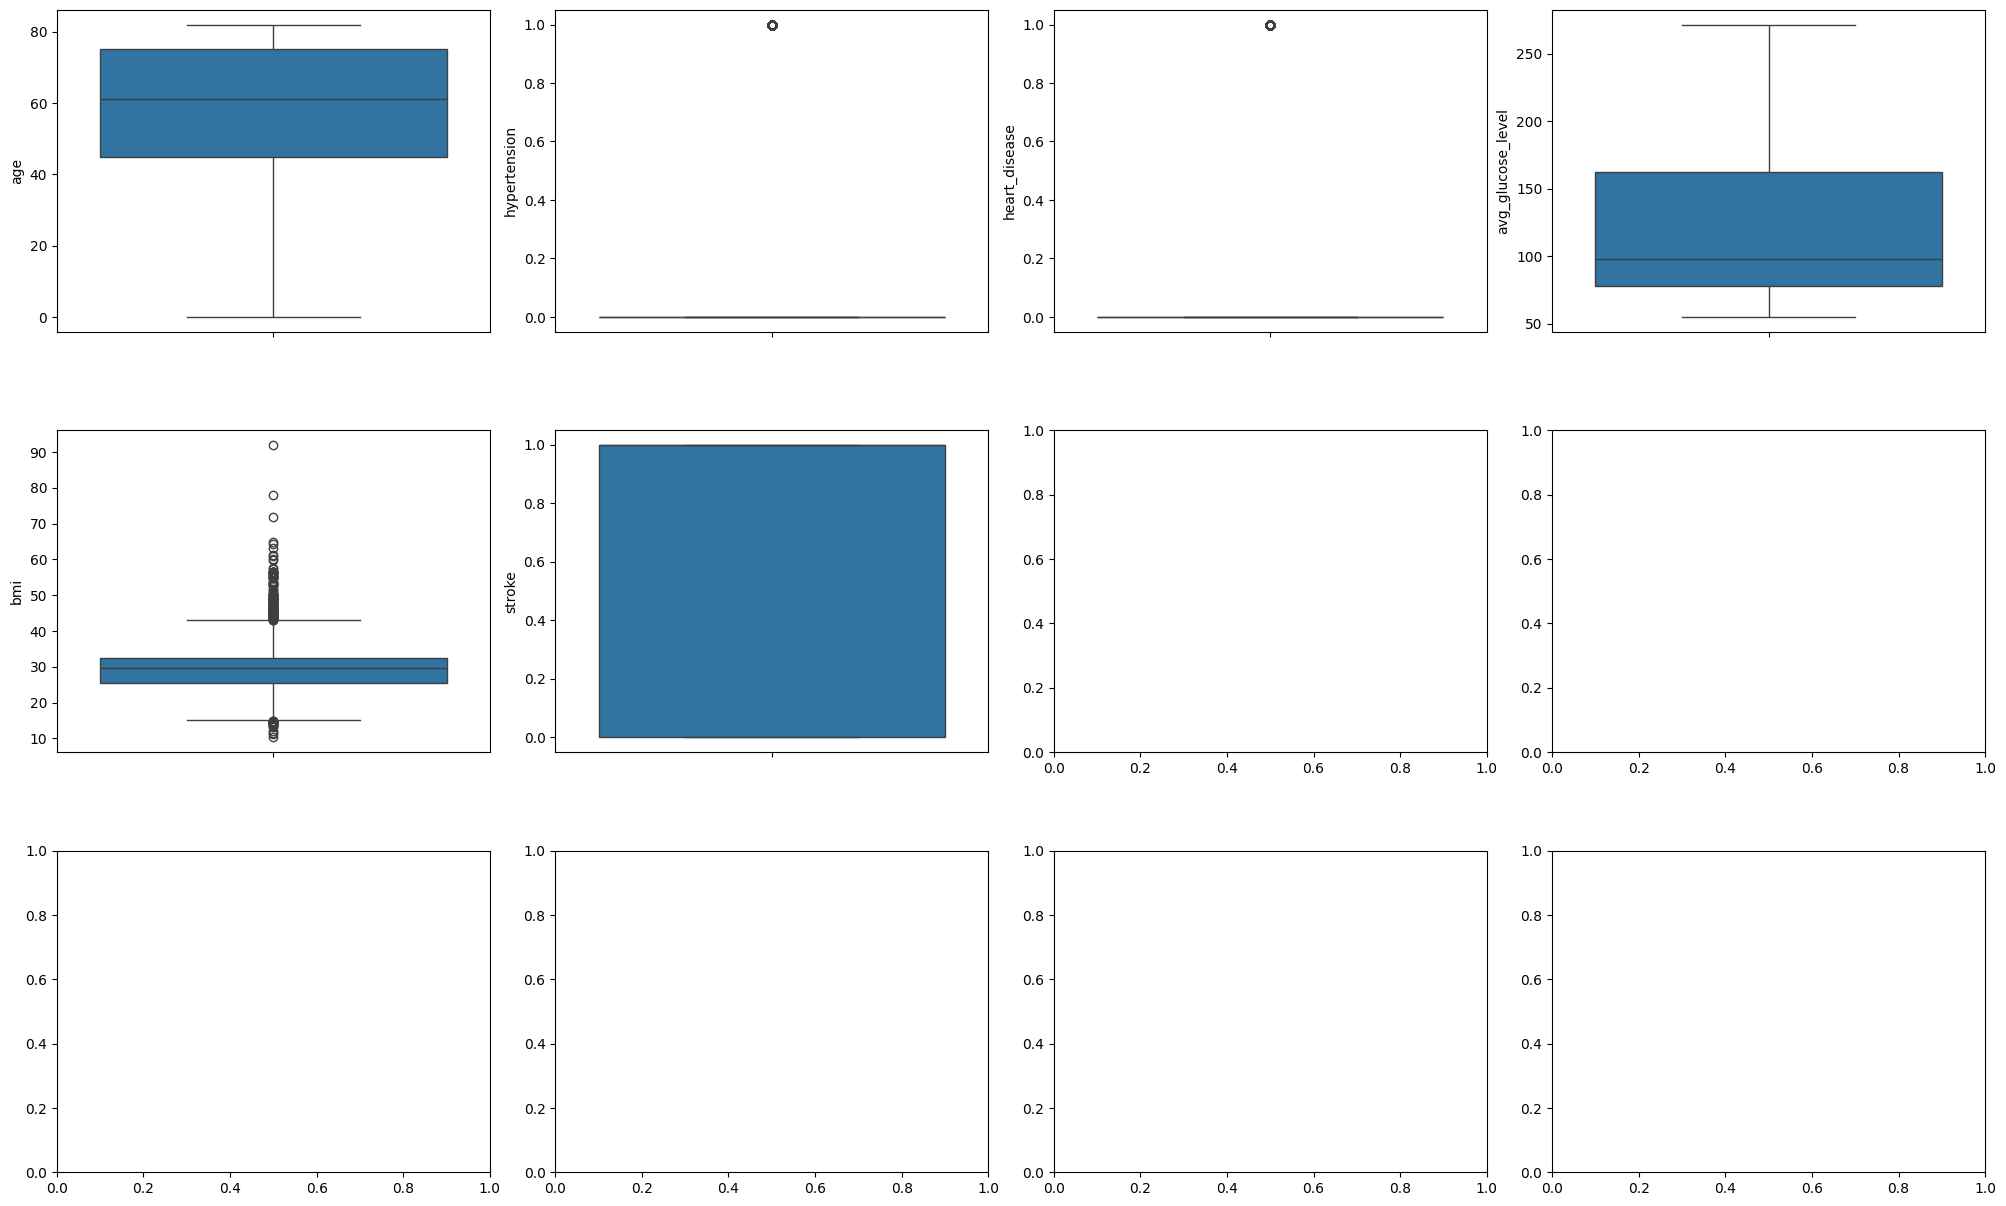

In [72]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 12))
index = 0
ax = ax.flatten()

for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


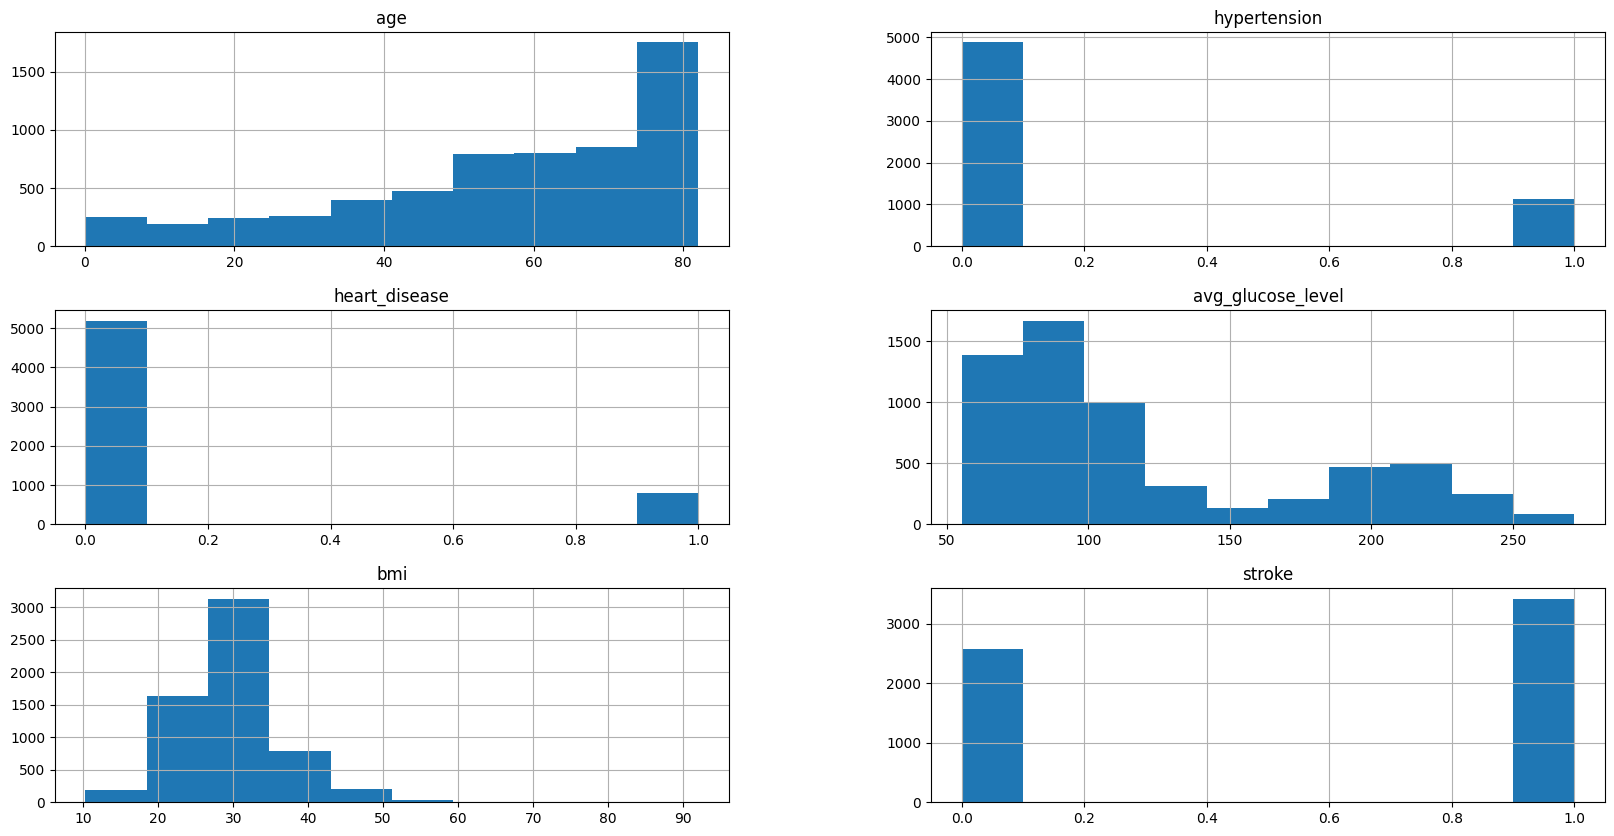

In [73]:
plt.rcParams['figure.figsize'] = [20,10]
# Histograms
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

[codecarbon INFO @ 13:03:41] Energy consumed for RAM : 0.001291 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:03:41] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:03:41] Energy consumed for All CPU : 0.005490 kWh
[codecarbon INFO @ 13:03:41] 0.006781 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:56] Energy consumed for RAM : 0.001333 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:03:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:03:56] Energy consumed for All CPU : 0.005667 kWh
[codecarbon INFO @ 13:03:57] 0.007000 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:57] 0.004158 g.CO2eq/s mean an estimation of 131.13755599538817 kg.CO2eq/year
[codecarbon INFO @ 13:04:11] Energy consumed for RAM : 0.001374 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:11] Delta energy consumed for CPU with constant : 0.000176 kWh, power : 42.5 W
[codecarbon

[codecarbon INFO @ 13:04:26] Energy consumed for RAM : 0.001416 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:26] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:27] Energy consumed for All CPU : 0.006020 kWh
[codecarbon INFO @ 13:04:27] 0.007436 kWh of electricity used since the beginning.


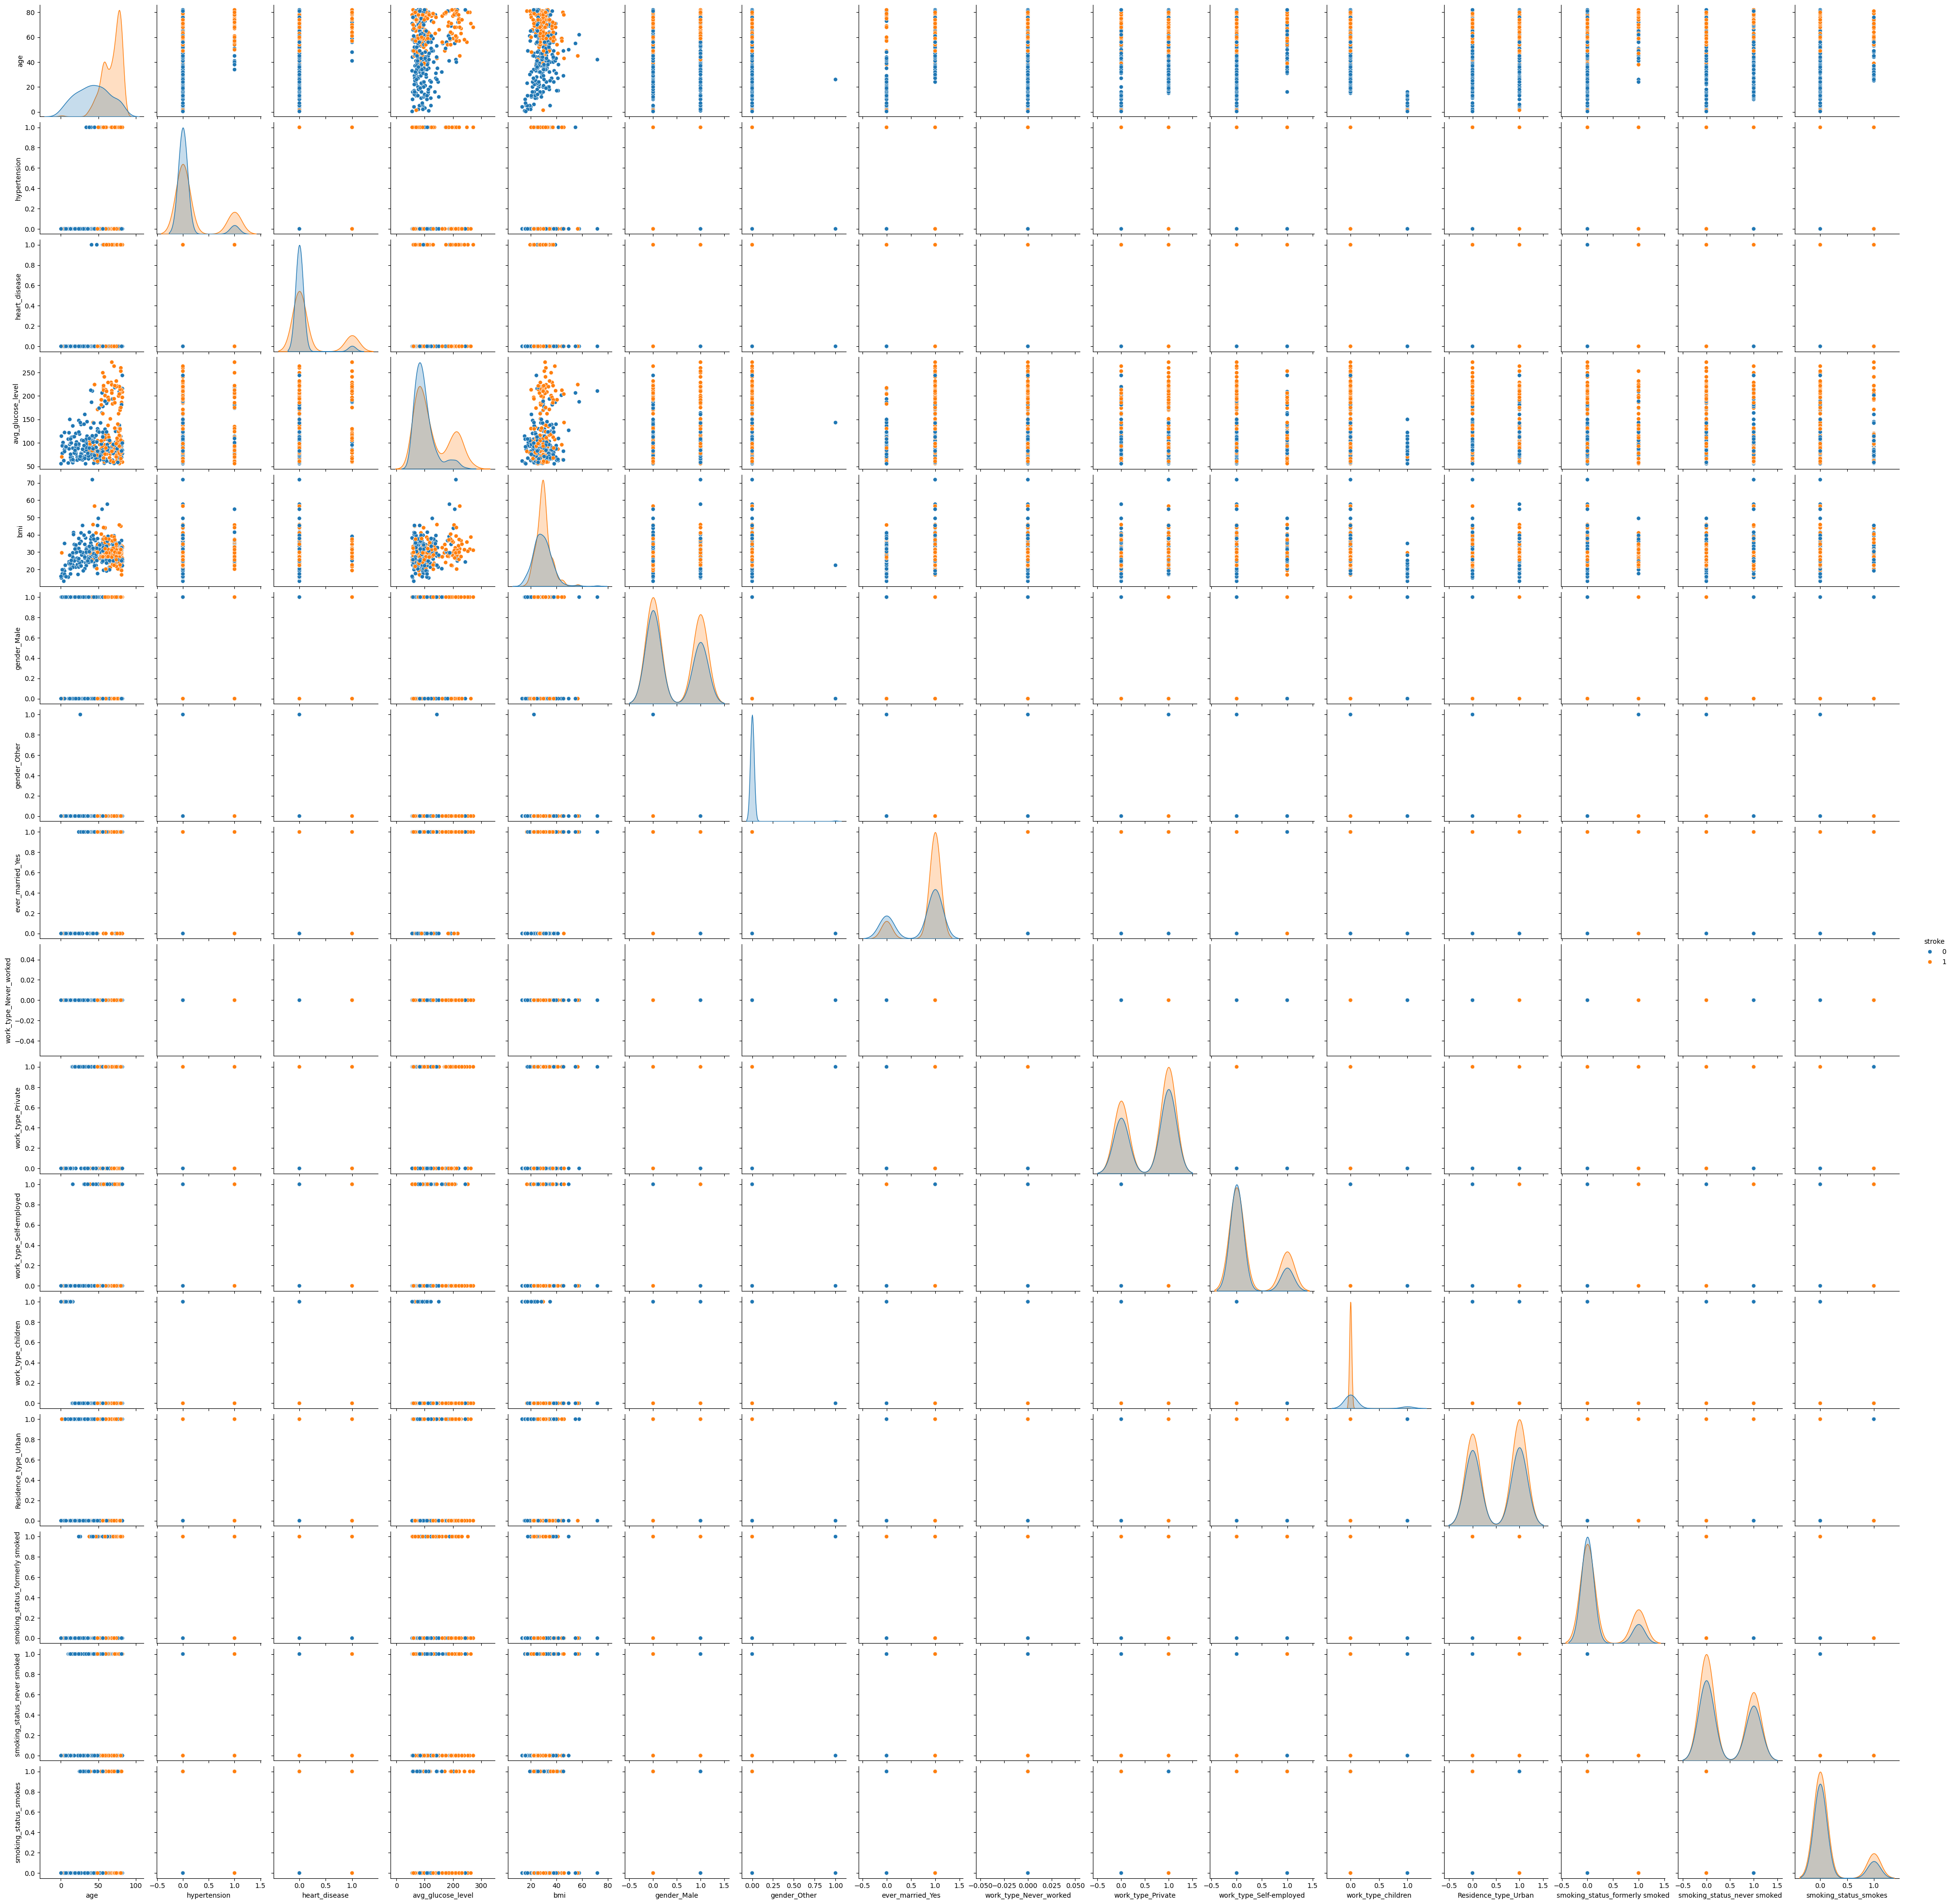

In [74]:
# Pairplot (optional, only numeric columns)
sns.pairplot(df_encoded.sample(500), hue="stroke")  # sample to avoid heavy plotting


<Axes: xlabel='stroke', ylabel='Count'>

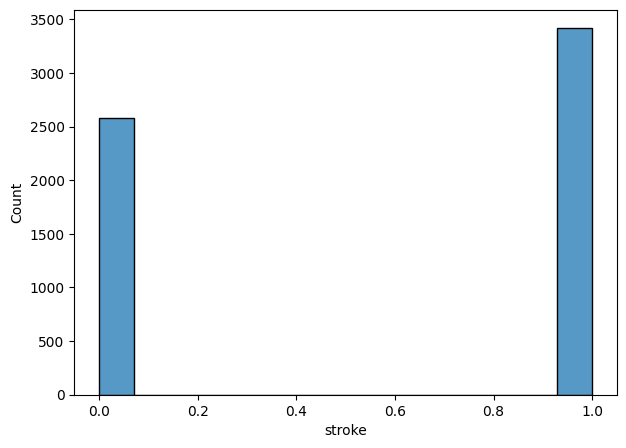

In [75]:
# Distribution of stroke
plt.rcParams['figure.figsize'] = [7,5]
sns.histplot(df['stroke'])


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

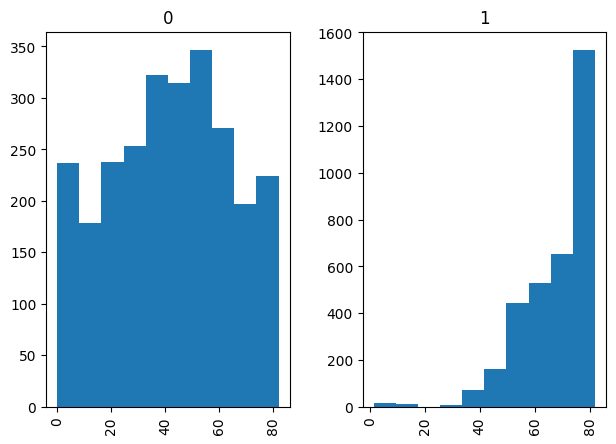

In [76]:
df.hist(column='age', by='stroke')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

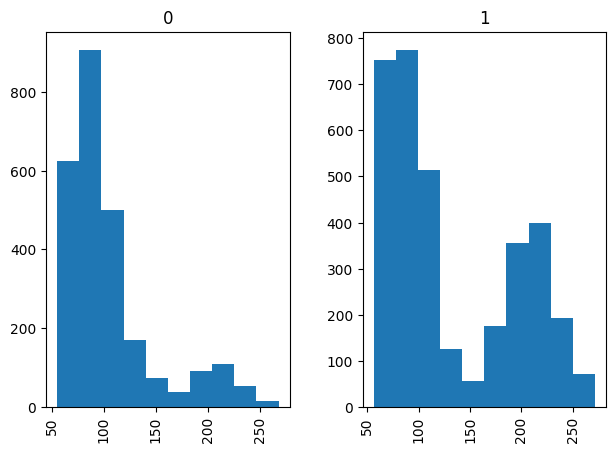

In [77]:
df.hist(column='avg_glucose_level', by='stroke')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

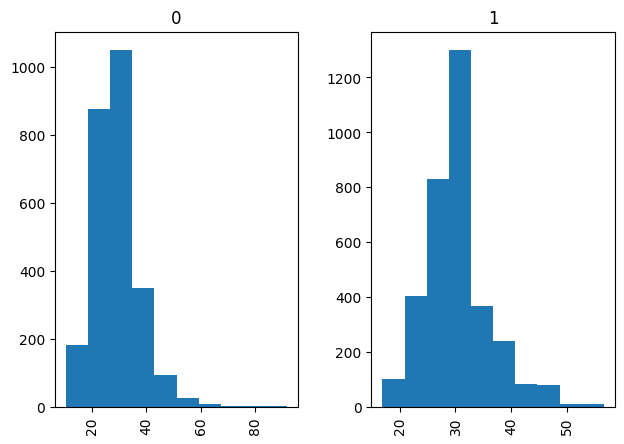

In [78]:
df.hist(column='bmi', by='stroke')

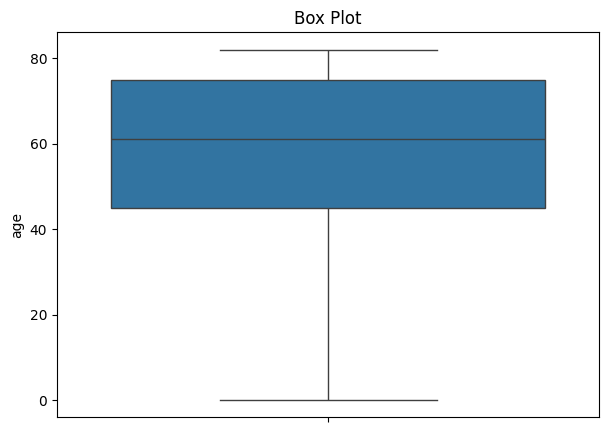

In [79]:
# Function for boxplot
def Box(col):
    plt.title("Box Plot")
    sns.boxplot(y=col, data=df)
    plt.show()

Box(df['age'])


In [80]:
# Skewness of features
skew_val = df.select_dtypes(include=['int64','float64']).skew().sort_values(ascending=False)
skew_val


,0
heart_disease,2.140948
hypertension,1.603085
bmi,0.977600
avg_glucose_level,0.961068
stroke,-0.282169
age,-0.891372


In [81]:
# Plotly visualizations
fig = px.box(df, x="stroke", y="age", color="stroke", width=800, height=400)
fig.show()

In [82]:
fig = px.box(df, x="stroke", y="avg_glucose_level", color="stroke", width=800, height=400)
fig.show()

In [83]:
fig = px.histogram(df, x="bmi", facet_row="stroke", template='plotly_dark')
fig.show()

In [84]:
fig = px.histogram(df, x="avg_glucose_level", facet_row="stroke", template='plotly_dark')
fig.show()

In [85]:
fig = px.pie(df, names="stroke", hole=0.4, template="plotly_dark")
fig.show()

In [86]:
fig = px.scatter(df, x="age", y="avg_glucose_level", color="stroke", template="plotly_dark", trendline="ols")
fig.show()

In [87]:
fig = px.scatter(df, x="bmi", y="avg_glucose_level", color="stroke", template="plotly_dark", trendline="lowess")
fig.show()

Text(0.5, 1.0, 'Missing Data in Percentages')

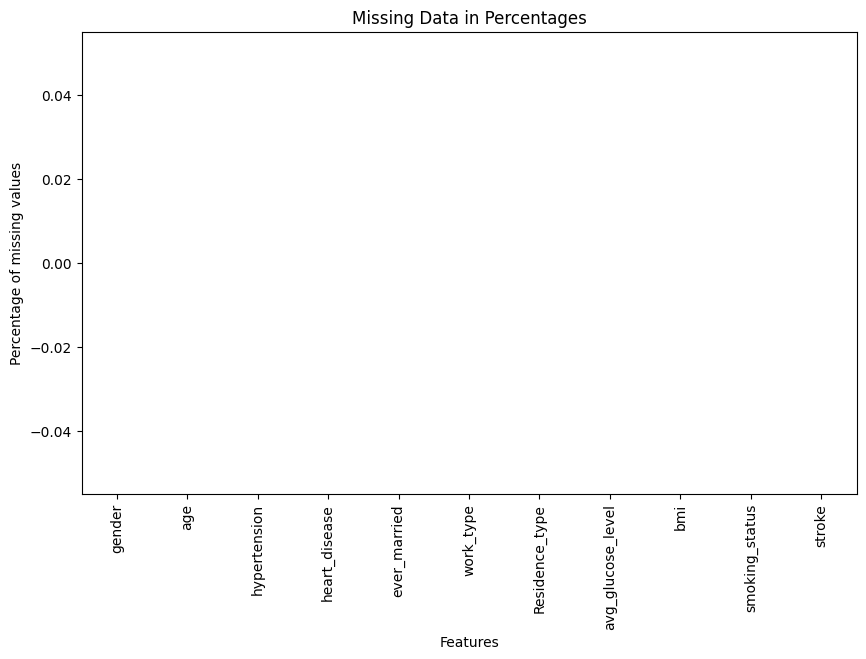

In [88]:
# Missing data percentage
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages')


In [89]:
# Encode categorical variables for modeling
df = pd.get_dummies(df, drop_first=True)

In [90]:
# Features and Target
X = df.drop('stroke', axis=1)
y = df['stroke']
X.shape, y.shape

((6000, 16), (6000,))

In [91]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [92]:
X = scaler.fit_transform(X)
X

array([[-0.86586362, -0.48012167, -0.39449213, ..., -0.54139029,
         1.30161725, -0.43426897],
       [ 0.47647687, -0.48012167,  2.53490485, ...,  1.84709629,
        -0.76827501, -0.43426897],
       [-0.86586362, -0.48012167, -0.39449213, ..., -0.54139029,
        -0.76827501, -0.43426897],
       ...,
       [ 0.66162728, -0.48012167, -0.39449213, ..., -0.54139029,
        -0.76827501,  2.30272035],
       [-0.86586362, -0.48012167, -0.39449213, ...,  1.84709629,
        -0.76827501, -0.43426897],
       [-0.44927519, -0.48012167, -0.39449213, ..., -0.54139029,
         1.30161725, -0.43426897]])

In [93]:
# Train-test split
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# **Using Logistic Regression**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [96]:
%pip install codecarbon -qqq
from codecarbon import EmissionsTracker
import time

In [97]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [98]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:04:41] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:04:41] [setup] RAM Tracking...
[codecarbon INFO @ 13:04:41] [setup] CPU Tracking...
[codecarbon INFO @ 13:04:41] Energy consumed for RAM : 0.001458 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:41] Delta energy consumed for CPU with constant : 0.000176 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:41] Energy consumed for All CPU : 0.006196 kWh
[codecarbon INFO @ 13:04:41] 0.007654 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:04:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:04:43] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:04:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20G

In [99]:
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [100]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:04:51] Energy consumed for RAM : 0.000023 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:51] Delta energy consumed for CPU with constant : 0.000099 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:51] Energy consumed for All CPU : 0.000099 kWh
[codecarbon INFO @ 13:04:51] 0.000122 kWh of electricity used since the beginning.


Training time: 8.35 s | CO₂ emissions: 0.000035 kg


In [101]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [102]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.795959595959596


In [103]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       852
           1       0.79      0.88      0.83      1128

    accuracy                           0.80      1980
   macro avg       0.80      0.78      0.79      1980
weighted avg       0.80      0.80      0.79      1980



<Axes: >

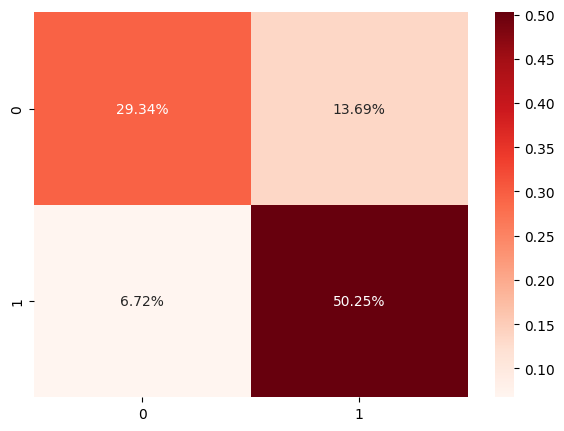

In [104]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Using Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [107]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:04:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:04:52] [setup] RAM Tracking...
[codecarbon INFO @ 13:04:52] [setup] CPU Tracking...
[codecarbon WARNING @ 13:04:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:04:54] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:04:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:04:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:04:54] [setup] GPU Tracking...
[codecarbon INFO @ 13:04:54] No GPU found.
[codecarbon INFO @ 13:04:54] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [108]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [109]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:04:54] Energy consumed for RAM : 0.000000 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:54] Delta energy consumed for CPU with constant : 0.000001 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:54] Energy consumed for All CPU : 0.000001 kWh
[codecarbon INFO @ 13:04:54] 0.000001 kWh of electricity used since the beginning.


Training time: 0.03 s | CO₂ emissions: 0.000000 kg


In [110]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [111]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.806060606060606


In [112]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       852
           1       0.77      0.93      0.85      1128

    accuracy                           0.81      1980
   macro avg       0.83      0.79      0.79      1980
weighted avg       0.82      0.81      0.80      1980



<Axes: >

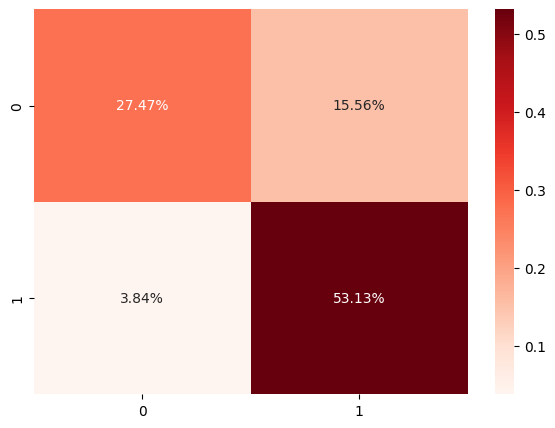

In [113]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Using Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [116]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:04:55] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:04:55] [setup] RAM Tracking...
[codecarbon INFO @ 13:04:55] [setup] CPU Tracking...
[codecarbon WARNING @ 13:04:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:04:56] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:04:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:04:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:04:56] [setup] GPU Tracking...
[codecarbon INFO @ 13:04:56] No GPU found.
[codecarbon INFO @ 13:04:56] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [117]:
# Training Model
model_rf.fit(X_train, y_train)

[codecarbon INFO @ 13:04:57] Energy consumed for RAM : 0.001499 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:57] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:57] Energy consumed for All CPU : 0.006374 kWh
[codecarbon INFO @ 13:04:57] 0.007873 kWh of electricity used since the beginning.


RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [118]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:04:58] Energy consumed for RAM : 0.000004 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:04:58] Delta energy consumed for CPU with constant : 0.000018 kWh, power : 42.5 W
[codecarbon INFO @ 13:04:58] Energy consumed for All CPU : 0.000018 kWh
[codecarbon INFO @ 13:04:58] 0.000023 kWh of electricity used since the beginning.


Training time: 1.53 s | CO₂ emissions: 0.000006 kg


In [119]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [120]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.7833333333333333


In [121]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.60      0.70       852
           1       0.75      0.93      0.83      1128

    accuracy                           0.78      1980
   macro avg       0.80      0.76      0.77      1980
weighted avg       0.80      0.78      0.77      1980



<Axes: >

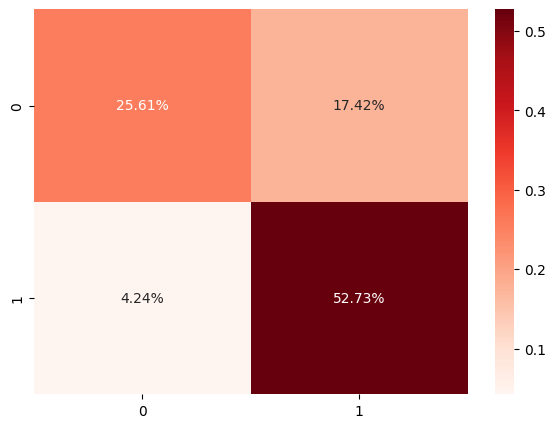

In [122]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

**Using XGBoost Classifier**

In [123]:
from xgboost import XGBClassifier

In [124]:
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [125]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:04:59] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:04:59] [setup] RAM Tracking...
[codecarbon INFO @ 13:04:59] [setup] CPU Tracking...
[codecarbon WARNING @ 13:05:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:05:00] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:05:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:05:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:05:00] [setup] GPU Tracking...
[codecarbon INFO @ 13:05:00] No GPU found.
[codecarbon INFO @ 13:05:00] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [126]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=5, num_parallel_tree=None, ...)

In [127]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:05:01] Energy consumed for RAM : 0.000002 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:05:01] Delta energy consumed for CPU with constant : 0.000007 kWh, power : 42.5 W
[codecarbon INFO @ 13:05:01] Energy consumed for All CPU : 0.000007 kWh
[codecarbon INFO @ 13:05:01] 0.000008 kWh of electricity used since the beginning.


Training time: 0.58 s | CO₂ emissions: 0.000002 kg


In [128]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [129]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.9222222222222223


In [130]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       852
           1       0.88      1.00      0.94      1128

    accuracy                           0.92      1980
   macro avg       0.94      0.91      0.92      1980
weighted avg       0.93      0.92      0.92      1980



<Axes: >

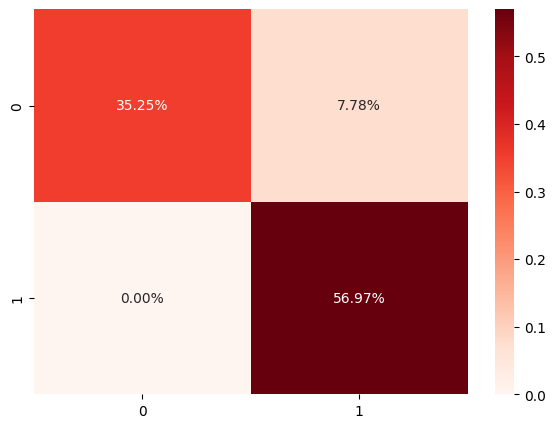

In [131]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Using KNeighbours**

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [134]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:05:02] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:05:02] [setup] RAM Tracking...
[codecarbon INFO @ 13:05:02] [setup] CPU Tracking...
[codecarbon WARNING @ 13:05:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:05:03] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:05:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:05:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:05:03] [setup] GPU Tracking...
[codecarbon INFO @ 13:05:03] No GPU found.
[codecarbon INFO @ 13:05:03] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [135]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [136]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:05:04] Energy consumed for RAM : 0.000000 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:05:04] Delta energy consumed for CPU with constant : 0.000001 kWh, power : 42.5 W
[codecarbon INFO @ 13:05:04] Energy consumed for All CPU : 0.000001 kWh
[codecarbon INFO @ 13:05:04] 0.000001 kWh of electricity used since the beginning.


Training time: 0.04 s | CO₂ emissions: 0.000000 kg


In [137]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [138]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.8601010101010101


In [139]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       852
           1       0.81      1.00      0.89      1128

    accuracy                           0.86      1980
   macro avg       0.90      0.84      0.85      1980
weighted avg       0.89      0.86      0.85      1980



<Axes: >

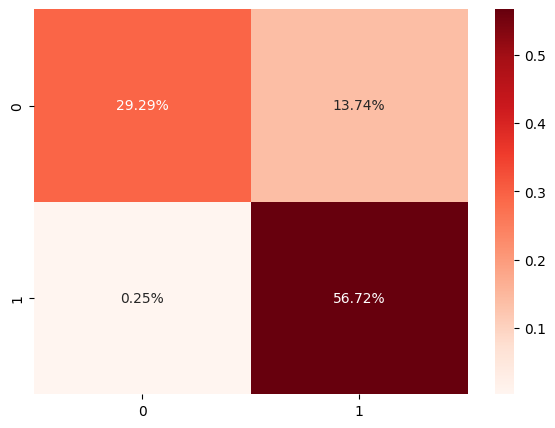

In [140]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Using SVM**

In [141]:
from sklearn.svm import SVC, LinearSVC

In [142]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [143]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [144]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon WARNING @ 13:05:06] Tracker already stopped !
[codecarbon INFO @ 13:05:06] Energy consumed for RAM : 0.000007 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:05:06] Delta energy consumed for CPU with constant : 0.000029 kWh, power : 42.5 W
[codecarbon INFO @ 13:05:06] Energy consumed for All CPU : 0.000030 kWh
[codecarbon INFO @ 13:05:06] 0.000037 kWh of electricity used since the beginning.


Training time: 2.53 s | CO₂ emissions: 0.000011 kg


In [145]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:05:06] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:05:06] [setup] RAM Tracking...
[codecarbon INFO @ 13:05:06] [setup] CPU Tracking...
[codecarbon WARNING @ 13:05:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:05:08] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:05:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:05:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:05:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:05:08] No GPU found.
[codecarbon INFO @ 13:05:08] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [146]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [147]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.8378787878787879


In [148]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       852
           1       0.81      1.00      0.89      1128

    accuracy                           0.86      1980
   macro avg       0.90      0.84      0.85      1980
weighted avg       0.89      0.86      0.85      1980



<Axes: >

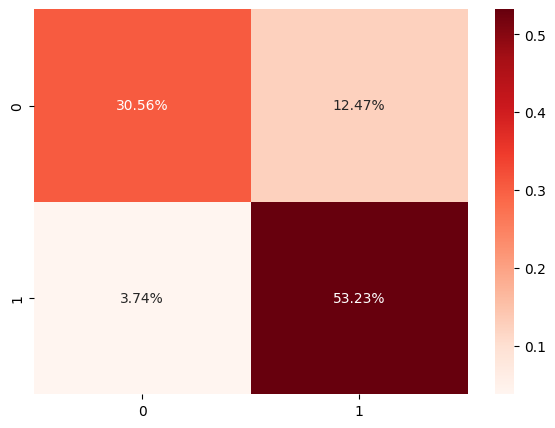

In [149]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Using AdaBoost Classifier**

In [150]:
from sklearn.ensemble import AdaBoostClassifier

In [151]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [152]:
# Track emissions + training time
tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

[codecarbon WARNING @ 13:05:09] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:05:09] [setup] RAM Tracking...
[codecarbon INFO @ 13:05:09] [setup] CPU Tracking...
[codecarbon WARNING @ 13:05:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:05:10] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:05:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:05:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:05:10] [setup] GPU Tracking...
[codecarbon INFO @ 13:05:10] No GPU found.
[codecarbon INFO @ 13:05:10] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [153]:
model_ada.fit(X_train, y_train)

[codecarbon INFO @ 13:05:12] Energy consumed for RAM : 0.001541 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:05:12] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:05:12] Energy consumed for All CPU : 0.006551 kWh
[codecarbon INFO @ 13:05:12] 0.008092 kWh of electricity used since the beginning.


AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [154]:
training_time = time.time() - start_time
emissions = tracker.stop()

print(f"Training time: {training_time:.2f} s | CO₂ emissions: {emissions:.6f} kg")

[codecarbon INFO @ 13:05:13] Energy consumed for RAM : 0.000007 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:05:13] Delta energy consumed for CPU with constant : 0.000031 kWh, power : 42.5 W
[codecarbon INFO @ 13:05:13] Energy consumed for All CPU : 0.000031 kWh
[codecarbon INFO @ 13:05:13] 0.000039 kWh of electricity used since the beginning.


Training time: 2.66 s | CO₂ emissions: 0.000011 kg


In [155]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [156]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.7833333333333333


In [157]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.89      0.57      0.69       852
           1       0.74      0.95      0.83      1128

    accuracy                           0.78      1980
   macro avg       0.82      0.76      0.76      1980
weighted avg       0.81      0.78      0.77      1980



<Axes: >

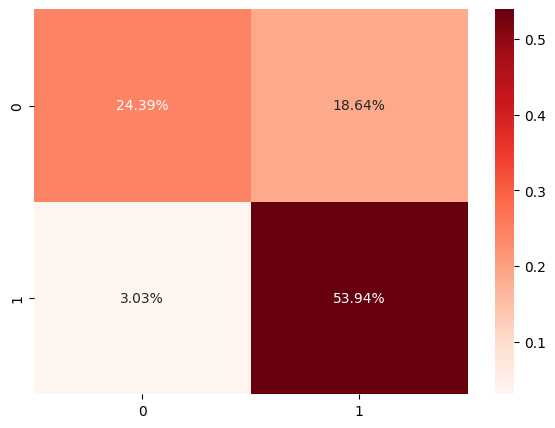

In [158]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

[codecarbon INFO @ 14:32:27] Energy consumed for RAM : 0.016080 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:32:27] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 14:32:27] Energy consumed for All CPU : 0.068346 kWh
[codecarbon INFO @ 14:32:27] 0.084425 kWh of electricity used since the beginning.


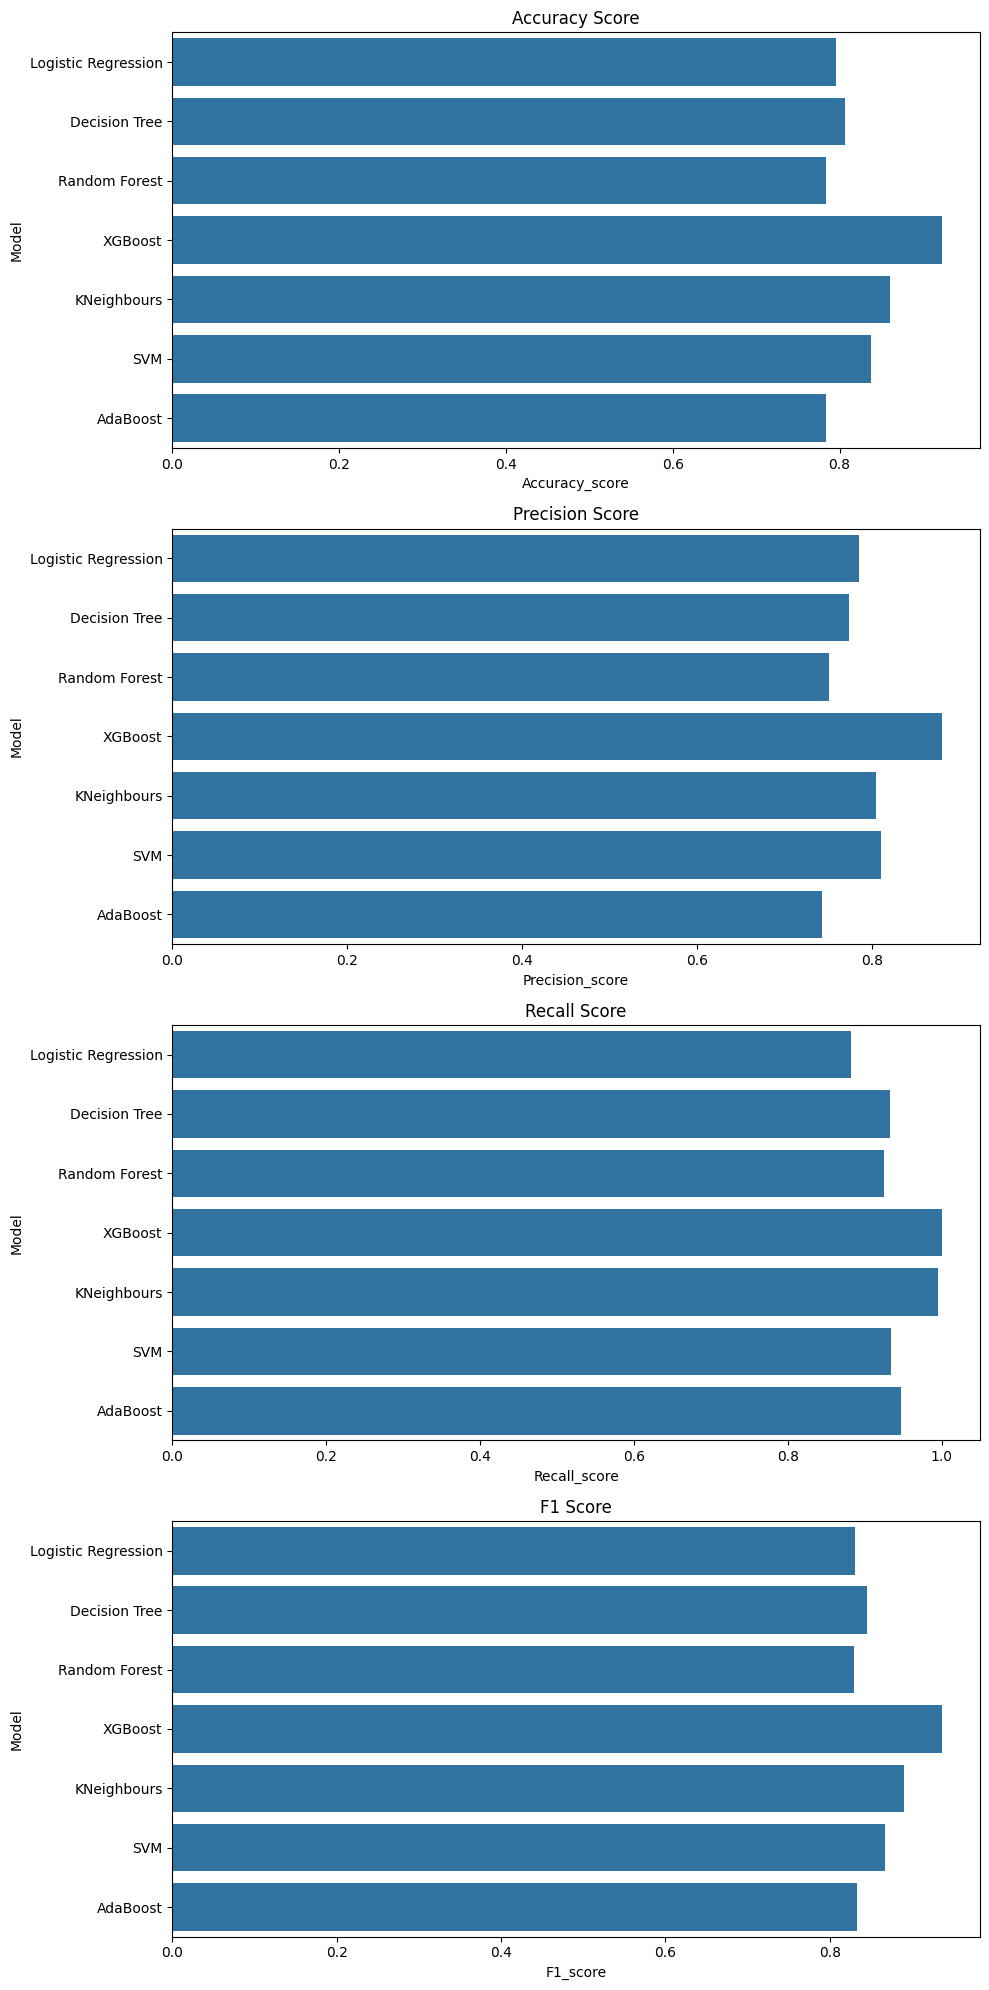

,Model,Accuracy_score,Precision_score,Recall_score,F1_score
3,XGBoost,0.922222,0.879875,1.000000,0.936100
4,KNeighbours,0.860101,0.805018,0.995567,0.890210
5,SVM,0.837879,0.810146,0.934397,0.867847
1,Decision Tree,0.806061,0.773529,0.932624,0.845659
0,Logistic Regression,0.795960,0.785940,0.882092,0.831245
2,Random Forest,0.783333,0.751620,0.925532,0.829559
6,AdaBoost,0.783333,0.743215,0.946809,0.832749


In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_lg = precision_score(y_test, pred_lg)
recall_lg = recall_score(y_test, pred_lg)
f1_lg = f1_score(y_test, pred_lg)

precision_dt = precision_score(y_test, pred_dt)
recall_dt = recall_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)

precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)

precision_xgb = precision_score(y_test, pred_xgb)
recall_xgb = recall_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test, pred_xgb)

precision_kn = precision_score(y_test, pred_kn)
recall_kn = recall_score(y_test, pred_kn)
f1_kn = f1_score(y_test, pred_kn)

precision_svm = precision_score(y_test, pred_svm)
recall_svm = recall_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)

precision_ada = precision_score(y_test, pred_ada)
recall_ada = recall_score(y_test, pred_ada)
f1_ada = f1_score(y_test, pred_ada)


models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada],
    'Precision_score' :[precision_lg, precision_dt, precision_rf, precision_xgb, precision_kn, precision_svm, precision_ada],
    'Recall_score' :[recall_lg, recall_dt, recall_rf, recall_xgb, recall_kn, recall_svm, recall_ada],
    'F1_score' :[f1_lg, f1_dt, f1_rf, f1_xgb, f1_kn, f1_svm, f1_ada]

})

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

sns.barplot(x='Accuracy_score', y='Model', data=models, ax=axes[0])
axes[0].set_title('Accuracy Score')

sns.barplot(x='Precision_score', y='Model', data=models, ax=axes[1])
axes[1].set_title('Precision Score')

sns.barplot(x='Recall_score', y='Model', data=models, ax=axes[2])
axes[2].set_title('Recall Score')

sns.barplot(x='F1_score', y='Model', data=models, ax=axes[3])
axes[3].set_title('F1 Score')


plt.tight_layout()
plt.show()

models.sort_values(by='Accuracy_score', ascending=False)

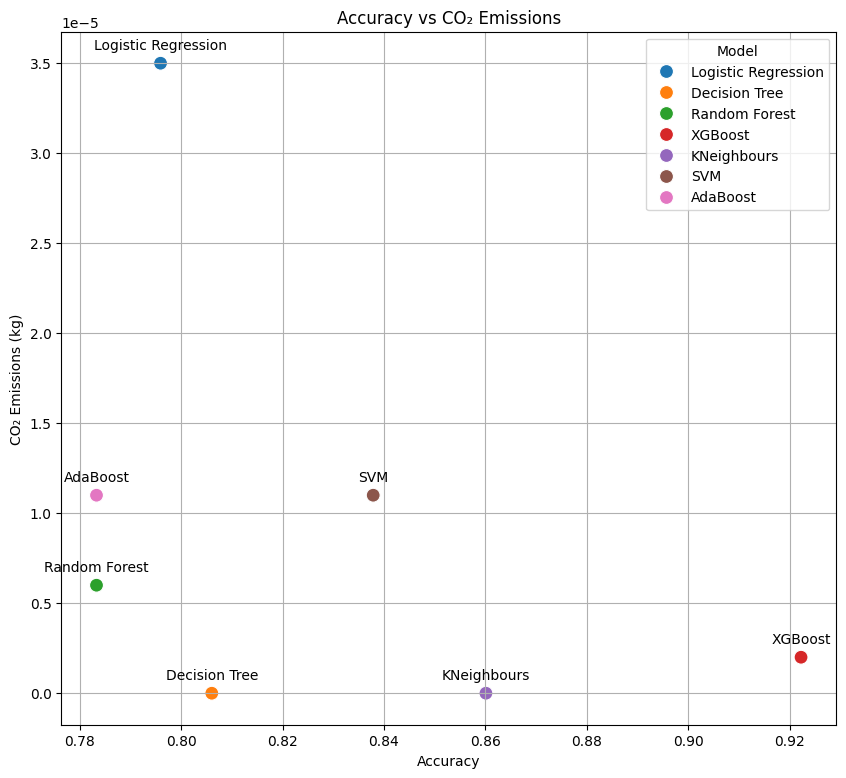

In [166]:
# Create a DataFrame with accuracy scores and emissions
emissions_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy': [lg, dt, rf, xgb, kn, sv, ada],
    'Emissions': [0.000035, 0.000000, 0.000006, 0.000002, 0.000000, 0.000011, 0.000011]}

emissions_df = pd.DataFrame(emissions_data)

# Create scatter plot
plt.figure(figsize=(10, 9))
sns.scatterplot(x='Accuracy', y='Emissions', hue='Model', data=emissions_df, s=100)
plt.title('Accuracy vs CO₂ Emissions')
plt.xlabel('Accuracy')
plt.ylabel('CO₂ Emissions (kg)')
plt.grid(True)

# Add model names as annotations to the points
for i, row in emissions_df.iterrows():
    plt.annotate(row['Model'], (row['Accuracy'], row['Emissions']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()